<h1> Time Series Challenge!

You will be working with lightning data and graphing time series. <br/> <font color='blue'>1. Import any libraries you might need. 

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd

The data file is named lightening_2019.csv

<font color='blue'> <br/> 2. Read in the data. Here you can use numpy arrays or panda dataframes. 

In [2]:
# .nc files can be opened with xarray
# .csv file is read here with pandas.read_csv
lightning_2019 = pd.read_csv('lightening_2019.csv')

<font color='blue'> 3. Figure out what each column contains

In [3]:
lightning_2019
# Date of the lightning strikes (2019)
# Exact location of lightning strike (lat and lon)
# Number of lightning strikes in that location

,date,lat,lon,number
0,20190101,-83.4,36.3,1
1,20190101,-88.5,29.0,2
2,20190101,-87.2,32.0,1
3,20190101,-84.2,35.0,1
4,20190101,-83.6,35.0,1
...,...,...,...,...
3073230,20191231,-63.0,40.1,1
3073231,20191231,-63.2,40.1,1
3073232,20191231,-63.0,40.2,1
3073233,20191231,-64.2,40.2,1


<font color='blue'> 4. You will notice that each row is a date and a location that has a certain count of lightening strikes. We want to know how many strikes happen per day, no matter where they occur. Use your epic new coding skills to create this dataset. 

In [4]:
# changing the date from type integer to type datetime
lightning_2019['date'] = pd.to_datetime(lightning_2019['date'], format = '%Y%m%d')

# setting the index to be the date
lightning_2019 = lightning_2019.set_index('date')

In [5]:
lightning_2019

,lat,lon,number
date,,,
2019-01-01,-83.4,36.3,1
2019-01-01,-88.5,29.0,2
2019-01-01,-87.2,32.0,1
2019-01-01,-84.2,35.0,1
2019-01-01,-83.6,35.0,1
...,...,...,...
2019-12-31,-63.0,40.1,1
2019-12-31,-63.2,40.1,1
2019-12-31,-63.0,40.2,1


In [6]:
lightning_2019_daily = lightning_2019.resample('D').sum()

In [7]:
lightning_2019_daily

,lat,lon,number
date,,,
2019-01-01,-6434.2,3039.4,140
2019-01-02,-9719.2,3077.7,134
2019-01-03,-37800.9,12283.8,670
2019-01-04,-42565.0,17322.2,857
2019-01-05,-143316.1,62349.9,3944
...,...,...,...
2019-12-27,-37487.0,12656.9,714
2019-12-28,-231162.7,79204.7,6937
2019-12-29,-96815.7,34118.8,2204


<font color='blue'>5. You know should a time series of dates with total lightening strikes for each day. Graph this time series and make it beautiful! Experiment with:
* <font color='blue'>Formatting the dates nicely on the x-axis
* <font color='blue'>Making sure the x and y axes have readable labels and titles
* <font color='blue'>Labeling the months along the x axis instead of days


<AxesSubplot:title={'center':'Lightning Strikes in 2019'}, xlabel='Date', ylabel='Strikes per Day'>

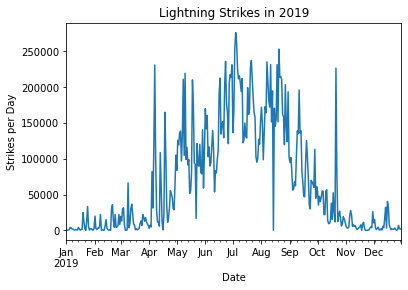

In [8]:
lightning_2019_daily['number'].plot(xlabel = 'Date', ylabel = 'Strikes per Day', title = 'Lightning Strikes in 2019')

<font color='red'> 6. We have now seen the time series of total number of lightening strikes per day.
<br/> Based on the latitude and longitude in each row of the original data, try to make a spatial map to visualize that data.